In [ ]:
conda install -c conda-forge ipywidgets
# kernel restart, パズルマークの@jupyter-widgets/jupyterlab-managerのインストールが必要

In [70]:
from PIL import Image
from ipywidgets import interact
import  seaborn  as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.special import comb
import math
from math import sqrt, factorial

def comb_num(x, y):
    """組み合わせの数"""
    return comb(x, y, exact=True)

# モーメント母関数

$
Mx(t) = E(e^{tx}) \\
離散型: Mx(t) = \sum^{n}_{x=1}e^{tx}f(x) \\
連続型: Mx(t) = \int_{-\infty}^{\infty}e^{tx}f(x)
$

# 超幾何分布

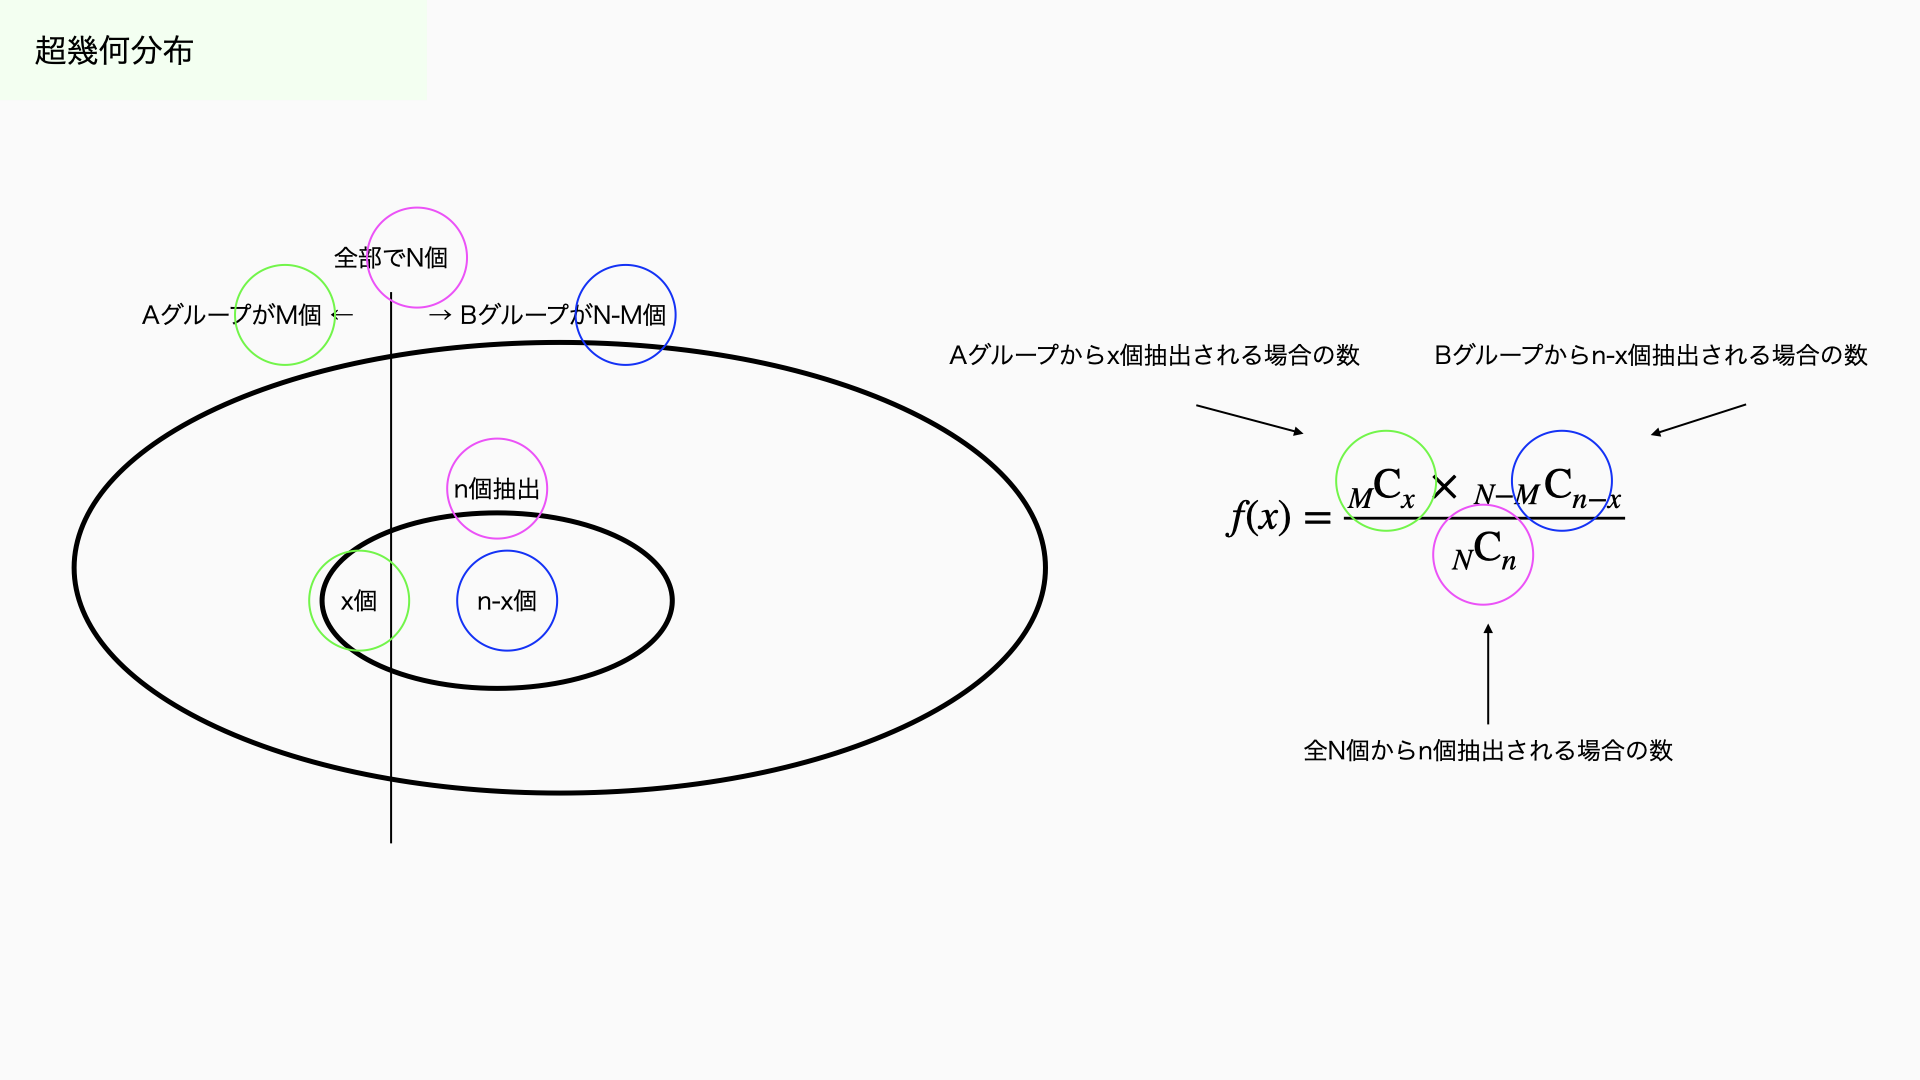

In [2]:
img = Image.open('超幾何分布.001.png')
img

## 確率分布

$f(x) = \frac{_{M}\mathrm{C}_{x} \, \times \, _{N-M\,}\mathrm{C}_{n-x}}{_N \mathrm{C} _n}$

In [59]:
@interact(N=(1, 200, 1), M=(1, 100, 1), n=(1, 100, 1))
def hypergeometric_distribution(N, M, n):
    def __f(x):
        """確率密度関数"""
        return comb_num(M, x) * comb_num((N-M), (n-x)) / comb_num(N, n)
    x_ax = range(n)
    y_ax = list(map(__f, x_ax))
    plt.bar(x_ax, y_ax)
    
    print(f"期待値: {n*M/N:.2f}\n"
          f"分散: {n*M*(N-M)*(N-n)/(N**2*(N-1)):.2f}\n"
          f"標準偏差: {sqrt(n*M*(N-M)*(N-n)/(N**2*(N-1))):.2f}")

interactive(children=(IntSlider(value=100, description='N', max=200, min=1), IntSlider(value=50, description='…

## 期待値

$
\begin{eqnarray}
E(X) &=& \sum^{n}_{x=1} xf(x) \\
     &=& \sum^{n}_{x=1} x\frac{_{M}\mathrm{C}_{x} \centerdot _{N-M}\mathrm{C}_{n-x}}{_N \mathrm{C} _n} \\
     &=& \sum^{n}_{x=1} x\frac{\frac{M!}{x!(M-x)!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{N!}{n!(N-n)!}} \\
     &=& \sum^{n}_{x=1} x\frac{\frac{M(M-1)!}{x(x-1)!((M-1)-(x-1))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{N(N-1)!}{n(n-1)!((N-1)-(n-1))!}} \\
     &=& \frac{nM}{N}\sum^{n}_{x=1} \frac{\frac{(M-1)!}{(x-1)!((M-1)-(x-1))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{(N-1)!}{(n-1)!((N-1)-(n-1))!}} \\
     &=& \frac{nM}{N}\sum^{n}_{x=1} \frac{_{M-1}\mathrm{C}_{x-1} \centerdot _{N-M}\mathrm{C}_{n-x}}{_{N-1} \mathrm{C} _{n-1}} \\
     &=& \frac{nM}{N}
\end{eqnarray}
$

### 補足

$
\sum^{n}_{x=1} \frac{_{M-1}\mathrm{C}_{x-1} \centerdot _{N-M}\mathrm{C}_{n-x}}{_{N-1} \mathrm{C} _{n-1}} = 1
$  
上記式は、超幾何分布の確率密度関数の合計値である。

## 分散

$
\begin{eqnarray}
V(X) &=& E((X-E(X))^2) \\
     &=& E(X^2 - 2XE(X) + E(X)^2) \\
     &=& E(X^2) -2E(X)^2 + E(X)^2 \\
　　　&=& E(X^2) - E(X)^2  \\
     &=& E(X(X-1)) + E(X) - E(X)^2 \\
\end{eqnarray} \\
より、E(X(X-1))がわかればV(X)を求めることができる。
$

$
\begin{eqnarray}
E(X(X-1)) &=& \sum^{N}_{x=1} x(x-1)f(x) \\
          &=& \sum^{N}_{x=1} x(x-1){x\frac{_{M}\mathrm{C}_{x} \, \centerdot _{N-M}\mathrm{C}_{n-x}}{_N \mathrm{C} _n}} \\
          &=& \sum^{N}_{x=1} x(x-1){x\frac{\frac{M(M-1)!}{x(x-1)!((M-1)-(x-1))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{N(N-1)!}{n(n-1)!((N-1)-(n-1))!}}} \\
          &=& n\,\frac{M}{N}\sum^{N}_{x=1} (x-1){\frac{\frac{(M-1)!}{(x-1)!((M-1)-(x-1))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{(N-1)!}{(n-1)!((N-1)-(n-1))!}}} \\
          &=& n\,\frac{M}{N}\sum^{N}_{x=1} (x-1){\frac{\frac{(M-1)(M-2)!}{(x-1)(x-2)!((M-2)-(x-2))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{(N-1)(N-2)!}{(n-1)(n-2)!((N-2)-(n-2))!}}} \\
          &=& n(n-1)\,\frac{M(M-1)}{N(N-1)} \sum^{N}_{x=1} {\frac{\frac{(M-2)!}{(x-2)!((M-2)-(x-2))!} \centerdot _{N-M}\mathrm{C}_{n-x}}{\frac{(N-2)!}{(n-2)!((N-2)-(n-2))!}}} \\
          &=& n(n-1)\frac{M(M-1)}{N(N-1)} \sum^{N}_{x=1} {\frac{_{M-2\,}\mathrm{C}_{x-2} \centerdot _{N-M}\mathrm{C}_{n-x}}{_{N-2\,}\mathrm{C}_{n-2}}} \\
          &=& n(n-1)\frac{M(M-1)}{N(N-1)} \\
\end{eqnarray}
$

$
よって、 \\
\begin{eqnarray}
V(X) &=& E(X(X-1)) + E(X) - E(X)^2 \\
     &=& n(n-1)\frac{M(M-1)}{N(N-1)} + n\frac{M}{N} - (n\frac{M}{N})^2\\
     &=& n(n-1)\frac{M(M-1)}{N(N-1)} + n\frac{M}{N} - n^2\,\frac{M^2}{N^2}\\
     &=& n(n-1)\frac{NM(M-1)}{N^2(N-1)} + n\frac{NM(N-1)}{N^2(N-1)} - n^2\,\frac{M^2(N-1)}{N^2(N-1)}\\
     &=& \frac{nM}{N^2(N-1)}\{N(n-1)(M-1) + N(N-1) - nM(N-1)\}\\
     &=& \frac{nM}{N^2(N-1)}\{nNM -nN -NM +N + N^2 -N - nNM +nM\}\\
     &=& \frac{nM}{N^2(N-1)}(N^2 -nN -NM +nM)\\
     &=& \frac{nM}{N^2(N-1)}(N-n)(N-M)\\
\end{eqnarray}
$

## モーメント母関数

難しいらしい。。

## 確率母関数

不明

# 二項分布

## 確率分布

$f(x) = _{n}\mathrm{C}_{x}p^{x}(1-p)^{n-x} \\
p: 事象Aが起こる確率 \\
1-p: 事象Bが起こる確率
$

In [64]:
@interact(n=(1, 1000, 1), p=(0, 1, 0.01))
def binomial_distribution(n, p):
    def __f(x):
        """確率密度関数"""
        return comb_num(n, x) * p**x * (1-p)**(n-x)
    x_ax = range(n+1)
    y_ax = list(map(__f, x_ax))
    plt.bar(x_ax, y_ax)
    print(f"期待値: {n*p:.2f}\n"
          f"分散: {n*p*(1-p):.2f}\n"
          f"標準偏差: {sqrt(n*p*(1-p)):.2f}")

interactive(children=(IntSlider(value=500, description='n', max=1000, min=1), FloatSlider(value=0.0, descripti…

## 期待値

$
\begin{eqnarray}
E(X) &=& \sum^n _{x=0}xf(x) \,\,ここで、x=0の時、(右辺)=0なのでxは1からとして良い。\\
     &=& \sum^n _{x=1}x \,_{n}\mathrm{C}_{x}p^{x}(1-p)^{n-x} \\
     &=& \sum^n _{x=1}x \frac{n!}{x!(n-x)!}p^{x}(1-p)^{n-x} \\
     &=& \sum^n _{x=1}x \frac{n(n-1)!}{x(x-1)!((n-1)-(x-1))!}p^{x}(1-p)^{n-x}\\
     &=& ｎ \sum^n _{x=1} \frac{(n-1)!}{(x-1)!((n-1)-(x-1))!}p^{x}(1-p)^{n-x}\\
     &=& ｎ \sum^n _{x=1} \,_{n-1}\mathrm{C}_{x-1} p \centerdot p^{x-1}(1-p)^{\{(n-1)-(x-1)\}}\\
     &=& ｎp \sum^n _{x=1} \,_{n-1}\mathrm{C}_{x-1} p^{x-1}(1-p)^{\{(n-1)-(x-1)\}} \,\,二項定理より、\\
     &=& ｎp (p + (1 - p))^{n-1}\\
     &=& ｎp\\
\end{eqnarray}
$

## 分散

$
\begin{eqnarray}
V(x) &=& E(X^2) - (E(X))^2 \\
     &=& E(X(X-1)) + E(X) - (E(X))^2
\end{eqnarray}
$

$
\begin{eqnarray}
E(X(X-1)) &=& \sum^n _{x=2}x(x-1)f(x) \,\,※x=0, 1の時、(右辺)=0なので、xは2からとする\\
          &=& \sum^n _{x=2}x(x-1) \,_{n}\mathrm{C}_{x}p^{x}(1-p)^{1-x} \\
          &=& \sum^n _{x=2}x(x-1) \frac{n(n-1)(n-2)!}{x(x-1)(x-2)!\{(n-2)-(x-2)\}!}p^2p^{x-2}(1-p)^{n-x}\\
          &=& n(n-1)p^2\sum^n _{x=2} \frac{(n-2)!}{(x-2)!((n-2)-(x-2))!}p^{x-2}(1-p)^{(n-2)-(x-2)}\\
          &=& n(n-1)p^2\sum^n _{x=2} \,_{n-2}\mathrm{C}_{x-2}p^{x-2}(1-p)^{(n-2)-(x-2)}\\
          &=& n(n-1)p^2 (p + (1 - p))^{n-2}\\
          &=& n(n-1)p^2\\
\end{eqnarray}
$

よって、

$
\begin{eqnarray}
V(x) &=& E(X(X-1)) + E(X) - (E(X))^2 \\
     &=& n(n-1)p^2 + np - n^2p^2 \\
     &=& n^2p^2-np^2 + np - n^2p^2 \\
     &=& np(1-p)
\end{eqnarray}
$


## モーメント母関数

$
\begin{eqnarray}
Mx(t) &=& \sum^n _{x=0}e^{tx}f(x) \\
      &=& \sum^n _{x=0}e^{tx} \,_{n}\mathrm{C}_{x} p^{x}(1-p)^{n-x} \\
      &=& \sum^n _{x=0} \,_{n}\mathrm{C}_{x} (e^tp)^{x}(1-p)^{n-x} \,\,\,\,二項定理より、\\
      &=& (e^tp + (1 - p))^n \\
Mx'(t) &=& n(e^tp + (1 - p))^{n-1}e^tp \\
Mx'(t) &=& np(e^tp + (1 - p))^{n-1}e^t \\
Mx'(t=0) &=& np \\
Mx''(t) &=& np((n-1)(e^tp + (1 - p))^{n-2}pe^{2t} + (e^tp + (1 - p))^{n-1}e^t) \\
Mx''(t=0) &=& n(n-1)p^2 + np \\
\end{eqnarray}
$

$
\begin{eqnarray}
V(x) &=& E(X^2) - (E(X))^2 \\
     &=& n(n-1)p^2 + np - n^2p^2 \\
     &=& np(1-p)
\end{eqnarray}
$

## 確率母関数

$
\begin{eqnarray}
Gx(t) &=& \sum^n _{x=0}t^{x}f(x) \\
      &=& \sum^n _{x=0}t^{x}\,_{n}\mathrm{C}_{x} p^{x}(1-p)^{n-x} \\
      &=& \sum^n _{x=0} \,_{n}\mathrm{C}_{x} (tp)^{x}(1-p)^{n-x} \\
      &=& (tp + 1 - p)^n \\
\end{eqnarray}
$

$
\begin{eqnarray}
Gx'(t) &=& np(tp + 1 - p)^{n-1} \\
Gx'(t=1) &=& np(p + 1 - p)^{n-1} \\
Gx'(t=1) &=& np \\
\end{eqnarray}
$

$
\begin{eqnarray}
Gx''(t) &=& n(n-1)p^2(tp + 1 - p)^{n-2} \\
Gx''(t=0) &=& n(n-1)p^2 \\
\end{eqnarray}
$

$
\begin{eqnarray}
V(X) &=& E(X^2) - (E(X))^2 \\
     &=& E(X(X-1)) + E(X) - (E(X))^2 \\
     &=& n(n-1)p^2 + np - n^2p^2 \\
     &=& np(1-p)
\end{eqnarray}
$

# ポアソン分布

## 概要

二項分布において、以下の特徴を持つ分布
- nが大きい
- pが小さい

np = λ(n->∞, p->0) とおく。

## 確率分布

$
np = \lambda \\
p  =  \frac{\lambda}{n} より、\\
\begin{eqnarray}
\lim_{n \to \infty} \,_{n}\mathrm{C}_{x}p^{x}(1-p)^{n-x} &=& \lim_{n \to \infty} \,\frac{n!}{x!(n-x)!} (\frac{\lambda}{n})^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!}\{n\cdot(n-1)\cdot(n-2)\cdot(n-3)...(n-x+1)\cdot(n-x)\cdot(n-x-1)...2\cdot1)\} \,\frac{1}{(n-x)!} (\frac{\lambda}{n})^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!}\{n\cdot(n-1)\cdot(n-2)\cdot(n-3)...(n-x+1)\cdot(n-x)!\} \,\frac{1}{(n-x)!} (\frac{\lambda}{n})^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!}\{n\cdot(n-1)\cdot(n-2)\cdot(n-3)...(n-x+1)\} \, (\frac{\lambda}{n})^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!}\{\frac{n}{n}\cdot\frac{(n-1)}{n}\cdot\frac{(n-2)}{n}\cdot\frac{(n-3)}{n}...\frac{(n-x+1)}{n}\} \, \lambda^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!}\{1\cdot(1-\frac{1}{n})\cdot(1-\frac{2}{n})\cdot(1-\frac{3}{n})...(1-\frac{(x-1)}{n}\} \, \lambda^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!} \, \lambda^{x}(1-\frac{\lambda}{n})^{n-x} \\
&=& \lim_{n \to \infty} \frac{1}{x!} \, \lambda^{x}\frac{(1-\frac{\lambda}{n})^{n}}{(1-\frac{\lambda}{n})^{x}} \\
&=& \lim_{n \to \infty} \frac{1}{x!} \, \lambda^{x}(1-\frac{\lambda}{n})^{n} \\
&=& \lim_{n \to \infty} \frac{1}{x!} \, \lambda^{x}e^{-\lambda} \\
&=& \frac{\lambda^{x}}{e^{\lambda}x!} \\
\end{eqnarray}
$

### 補足 ネイピア数について

ネイピア数の定義:  
$a^{x}$を微分しても$a^{x}$になるような$a$をネイピア数と定義する。  

$
\begin{eqnarray}
\frac{d}{dx}a^{x} &=& \lim_{h \to 0} \frac{a^{x+h}-a^{x}}{h} \\
                  &=& a^{x} \lim_{h \to 0} \frac{a^{h}-1}{h} \\
                  &=& a^{x}
\end{eqnarray}
$  
  
つまり、上の式から$\lim_{h \to 0} \frac{a^{h}-1}{h} = 1$となるような$a$を算出すれば、ネイピア数を特定できる。  
  
$
\begin{eqnarray}
\lim_{h \to 0} \frac{a^{h}-1}{h} &=& 1 \\
\lim_{h \to 0} a^{h}-1 &=& \lim_{h \to 0} h \\
\lim_{h \to 0} a^{h} &=& \lim_{h \to 0} h + 1 \\
a &=& \lim_{h \to 0} (h + 1)^{\frac{1}{h}} \\
a &=& \lim_{h \to \infty} (\frac{1}{h} + 1)^{h} \\
a &=& e \\
\end{eqnarray}
$
  
$a = \lim_{h \to 0} (\frac{1}{h} + 1)^{\frac{1}{n}}$ <-詳しくはこちらhttps://enakai00.hatenablog.com/entry/2016/12/23/214738   

次に、
$\lim_{h \to \infty} (\frac{x}{h} + 1)^{h}$
を考える。  
$\frac{x}{h} = \frac{1}{g}$とおくと、$h=gx, \ g \to \infty$  
$
\begin{eqnarray}
\lim_{h \to \infty} (\frac{x}{h} + 1)^{h} &=& \lim_{g \to \infty} (\frac{1}{g} + 1)^{gx} \\
&=& e^{x}
\end{eqnarray}
$
  
つまり、次のような式変形ができる。  
<例>  
$
\begin{eqnarray}
\lim_{h \to \infty} (\frac{\lambda}{h} + 1)^{h} &=& e^{\lambda} \\
\lim_{h \to \infty} (\frac{-t \lambda}{h} + 1)^{h} &=& e^{-t\lambda}
\end{eqnarray}
$  
  
次に、 $f(x) = e^{x}$をマクローリン展開していくと、  
$f(a) + f'(a)(x-a) + \frac{1}{2!}f''(a)(x-a)^{2} + \frac{1}{3!}f'''(a)(x-a)^{3} + ...$  
a=0を代入すると、
$
f(0) + f'(0)x + \frac{1}{2!}f''(0)x^{2} + \frac{1}{3!}f'''(0)x^{3} + ... \\
= 1 + x + \frac{1}{2!}x^{2} + \frac{1}{3!}x^{3} + ... \\
= \sum^\infty _{k=0} \frac{x^{k}}{k!}\\
$
となる。  
  
これより、  
$
\begin{eqnarray}
e^{1} &=& \sum ^\infty_{k=0} \frac{1}{k!} \\
e^{\lambda} &=& \sum^\infty_{k=0} \frac{\lambda^{k}}{k!} \\
e^{t\lambda} &=& \sum^\infty_{k=0} \frac{(t\lambda)^k}{k!} \\
\end{eqnarray}
$

## 確率分布である証明

$
\begin{eqnarray}
\sum_{x=0}^{\infty} \frac{\lambda^{x}}{e^{\lambda}x!} &=& \frac{1}{e^{\lambda}} \sum_{x=0}^{\infty} \frac{\lambda^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}}e^{\lambda} \\
&=& 1
\end{eqnarray}
$

In [81]:
@interact(n=(1, 200, 1), p=(0, 0.1, 0.001))
def poisson_distribution(n, p):
    def __f(x):
        """確率密度関数"""
        return (n*p)**x / (math.e**(n*p) * factorial(x))
    x_ax = range(n+1)
    y_ax = list(map(__f, x_ax))
    plt.bar(x_ax, y_ax)
    print(f"期待値: {n*p:.2f}\n"
          f"分散: {n*p*(1-p):.2f}\n"
          f"標準偏差: {sqrt(n*p*(1-p)):.2f}")

interactive(children=(IntSlider(value=100, description='n', max=200, min=1), FloatSlider(value=0.05, descripti…

## 期待値

$
\begin{eqnarray}
E(x) &=& \sum^{\infty}_{x=0} x \frac{\lambda^{x}}{e^{\lambda}x!} \\
&=& \lambda \sum^{\infty}_{x=0} x \frac{\lambda^{x-1}}{e^{\lambda}x(x-1)!} \\
&=& \lambda \sum^{\infty}_{x=0} \frac{\lambda^{x-1}}{e^{\lambda}(x-1)!} \\
&=& \lambda
\end{eqnarray}
$
  
最後にシグマ以降が無くなっているのは、"確率分布である証明"と同じ形になっており、つまり"=1"になったからである。

## 分散

$
V(x) = \lambda
$

$
二項分布の分散は、np(1-p)である。\\
ポアソン分布においては、pを限りなく小さくするため、 (1-p) -> 1となり、感覚的にV(x) = \lambda となることが理解できる。
$

## モーメント母関数

$
\begin{eqnarray}
Mx(t) &=& \sum^{\infty}_{x=0} e^{tx} \frac{\lambda^{x}}{e^{\lambda}x!} \\
&=& \frac{1}{e^{\lambda}} \sum^{\infty}_{x=0} e^{tx} \frac{\lambda^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}} \sum^{\infty}_{x=0} \frac{ (e^{t} \lambda)^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}} e^{e^{t} \lambda} \\
&=& e^{-\lambda} e^{e^{t} \lambda} \\
&=& e^{e^{t} \lambda -\lambda } \\
&=& exp(e^{t} \lambda -\lambda ) \\
\end{eqnarray}
$

$
\begin{eqnarray}
Mx(t) &=& \sum^{\infty}_{x=0} e^{tx} \frac{\lambda^{x}}{e^{\lambda}x!} \\
&=& \frac{1}{e^{\lambda}} \sum^{\infty}_{x=0} e^{tx} \frac{\lambda^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}} \sum^{\infty}_{x=0} \frac{ (e^{t} \lambda)^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}} e^{e^{t} \lambda} \\
&=& e^{-\lambda} e^{e^{t} \lambda} \\
&=& e^{e^{t} \lambda -\lambda } \\
&=& exp(e^{t} \lambda -\lambda ) \\
Mx'(t) &=& e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda ) \\
Mx''(t) &=& e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda ) + e^{t} \lambda \centerdot e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda )\\
\end{eqnarray}
$

期待値  

$
\begin{eqnarray}
Mx'(t) &=& e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda ) \\
Mx'(t)|_{t=0} &=& \lambda \centerdot exp(\lambda -\lambda) \\
Mx'(t)|_{t=0} &=& \lambda\\
\end{eqnarray}
$

よって、
$
E(X) = \lambda
$

分散

$
\begin{eqnarray}
Mx''(t) &=& e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda ) + e^{t} \lambda \centerdot e^{t} \lambda \centerdot exp(e^{t} \lambda -\lambda )\\
Mx''(t)|_{t=0} &=& \lambda + \lambda^{2}\\
\end{eqnarray}
$

よって、

$
\begin{eqnarray}
V(X^{2}) &=& E(X^{2}) - (E(X))^{2} \\
&=& \lambda + \lambda^{2} - \lambda^{2} \\
&=& \lambda
\end{eqnarray}
$

## 確率母関数

方法1.  

$
\begin{eqnarray}
Gx(t) &=& \sum^{\infty}_{x=0} t^{x} \frac{\lambda^{x}}{e^{\lambda}x!} \\
Gx'(t) &=& \sum^{\infty}_{x=0} xt^{x-1} \frac{\lambda^{x}}{e^{\lambda}x!} \\
&=& \sum^{\infty}_{x=0} xt^{x-1} \frac{\lambda \centerdot \lambda^{x-1}}{e^{\lambda}x(x-1)!} \\
&=& \sum^{\infty}_{x=0} t^{x-1} \frac{\lambda \centerdot \lambda^{x-1}}{e^{\lambda}(x-1)!} \\
Gx''(t) &=& \sum^{\infty}_{x=0} (x-1)t^{x-2} \frac{\lambda^{2} \centerdot \lambda^{x-2}}{e^{\lambda}(x-1)(x-2)!} \\
&=& \sum^{\infty}_{x=0} t^{x-2} \frac{\lambda^{2} \centerdot \lambda^{x-2}}{e^{\lambda}(x-2)!} \\
\end{eqnarray}
$  
よって、  
$
\begin{eqnarray}
E(X) &=& Gx'(t)| _{t=1} \\
&=& \sum^{\infty}_{x=0} \frac{\lambda \centerdot \lambda^{x-1}}{e^{\lambda}(x-1)!} \\
&=& \lambda \sum^{\infty}_{x=0} \frac{\lambda^{x-1}}{e^{\lambda}(x-1)!} \\
&=& \lambda
\end{eqnarray}
$  
  
$
\begin{eqnarray}
V(X) &=& E(X(X-1)) + E(X) - (E(X))^{2} \\
&=& Gx''(t)|_{t=1} + Gx'(t)|_{t=1} - (Gx'(t)|_{t=1})^{2} \\
&=& \lambda^{2} + \lambda - \lambda^{2} \\
&=& \lambda
\end{eqnarray}
$  
  
期待値、分散を求める式でのシグマ以降は、ポアソン分布の確率分布の形になるので1となる。  
方法2の方が楽。

方法2.

$
\begin{eqnarray}
Gx(t) &=& \sum^{\infty}_{x=0} t^{x} \frac{\lambda^{x}}{e^{\lambda}x!} \\
&=& \sum^{\infty}_{x=0} \frac{(t\lambda)^{x}}{e^{\lambda}x!} \\
&=& \frac{1}{e^{\lambda}}\sum^{\infty}_{x=0} \frac{(t\lambda)^{x}}{x!} \\
&=& \frac{1}{e^{\lambda}} e^{t\lambda} \\
&=& exp(t\lambda - \lambda) \\
Gx'(t) &=&\lambda exp(t\lambda - \lambda) \\
Gx''(t) &=&\lambda^{2} exp(t\lambda - \lambda) \\
\end{eqnarray}
$  

よって、  
$
\begin{eqnarray}
E(X) &=& Gx'(t)|_{t=1} \\
&=& \lambda
\end{eqnarray}
$  
$
\begin{eqnarray}
V(X) &=& E(X(X-1)) + E(X) - (E(X))^{2} \\
&=& Gx''(t)|_{t=1} + Gx'(t)|_{t=1} - (Gx'(t)|_{t=1})^{2} \\
&=& \lambda^{2} + \lambda - \lambda^{2} \\
&=& \lambda
\end{eqnarray}
$